In [1]:
import numpy as np
import os
import pandas as pd
import pandas_profiling
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time
from kmodes.kmodes import KModes

### Sample codes from the package author:

reference: https://github.com/nicodv/kmodes

In [2]:
# random categorical data
data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 789.0
Run 1, iteration: 2/100, moves: 9, cost: 786.0
Run 1, iteration: 3/100, moves: 1, cost: 786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 22, cost: 798.0
Run 2, iteration: 2/100, moves: 7, cost: 793.0
Run 2, iteration: 3/100, moves: 2, cost: 793.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 23, cost: 789.0
Run 3, iteration: 2/100, moves: 1, cost: 789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 802.0
Run 4, iteration: 2/100, moves: 4, cost: 800.0
Run 4, iteration: 3/100, moves: 0, cost: 800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 24, cost: 796.0
Run 5, iteration: 2/100, moves:

### Milliman Dataset

In [3]:
os.chdir("/home/capsops/sha")

In [4]:
# Use a smaller data set to save time
df = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [5]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
columnTypes = df.dtypes

columnTypesGroups = df.columns.to_series().groupby(df.dtypes).groups

columnTypes.value_counts()

float64    754
object     156
int64      153
dtype: int64

In [7]:
columnTypes.loc[columnTypes == 'object', ]

Gender                                         object
Dist                                           object
Comm                                           object
Pol_TermReason                                 object
OutOfStateMail_C1                              object
OwnerOccupied_C1                               object
LandUse_C1                                     object
GarageType_C1                                  object
Pool_C1                                        object
Style_C1                                       object
ConstructionType_C1                            object
ExteriorWall_C1                                object
Foundation_C1                                  object
RoofCover_C1                                   object
RoofType_C1                                    object
Heating_C1                                     object
AirConditioning_C1                             object
Elevator_C1                                    object
Fireplace_C1                

In [9]:
columnTypes

ValDate                    float64
IssDate                    float64
IssAgeALB                  float64
Dur                        float64
AttAge                     float64
Gender                      object
JointInd                   float64
AV                         float64
CSV                        float64
SCPeriod                     int64
WDtoDate                   float64
WDCount                    float64
DeptoDate                  float64
GMDBInd                    float64
Dist                        object
Comm                        object
AVPctEq                    float64
Pol_TermReason              object
Pol_TermDt                 float64
Death                      float64
OutOfStateMail_C1           object
OwnerOccupied_C1            object
LandUse_C1                  object
PurchaseDt_C1              float64
PurchasePrice_C1             int64
PctLandValue_C1              int64
YearBuilt_C1                 int64
LotSize_C1                 float64
BuildingArea_C1     

In [27]:
df['Owner.Occupied.Housing.Units.Median.Value.Owner.Occupied.Housing.Units_C3'].value_counts()

-2147483648    6006
 100000         447
 125000          62
 150000          55
 250000          50
 187500          47
 175000          42
 137500          42
 350000          39
 112500          39
 162500          38
 200000          36
 90000           36
 225000          33
 219721          33
 300000          33
 95000           31
 115000          31
 132500          27
 80000           26
 450000          25
 70000           24
 97100           23
 275000          23
 97500           22
 85000           22
 97800           22
 625000          21
 98500           21
 92500           21
               ... 
 196691           1
 195695           1
 184425           1
 49259            1
 585837           1
 122991           1
 289933           1
 77941            1
 233505           1
 274453           1
 94078            1
 202768           1
 96220            1
 364828           1
 296930           1
 573413           1
 174054           1
 251880           1
 224324           1


In [30]:
df['MarkettoArea_C1'].value_counts()

125.000000    24
83.333333     23
100.000000    21
90.909091     21
62.500000     18
71.428571     18
166.666667    18
111.111111    16
76.923077     16
95.238095     15
75.000000     15
80.000000     14
150.000000    14
133.333333    13
72.916667     13
115.384615    12
107.142857    12
66.666667     12
78.947368     12
68.181818     11
142.857143    11
55.555556     11
153.846154    10
102.564103    10
96.153846     10
112.500000     9
200.000000     9
187.500000     9
50.000000      9
145.833333     9
              ..
183.217860     1
102.430556     1
108.633776     1
130.617978     1
146.551724     1
174.144038     1
26.115859      1
115.799804     1
133.658009     1
117.730162     1
365.469749     1
127.612272     1
312.407681     1
64.701378      1
117.793792     1
363.107822     1
131.630648     1
184.033613     1
247.300216     1
537.630104     1
76.869806      1
83.583208      1
690.789474     1
89.829250      1
77.160494      1
165.256627     1
129.435620     1
155.026455    

### Check for Missing Values in the dataset
reference: https://medium.com/@numanyilmaz61/handling-missing-data-93d3ce5d0161

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59159 entries, 0 to 59158
Columns: 1063 entries, ValDate to PolNum_UW
dtypes: float64(754), int64(153), object(156)
memory usage: 479.8+ MB


In [35]:
percNA = df.isnull().sum()/df.shape[0]
columnSummary = pd.concat((percNA, columnTypes), axis = 1)
columnSummary.columns = ['percNA', 'columnTypes']

In [132]:
count, division = np.histogram(columnSummary.percNA)

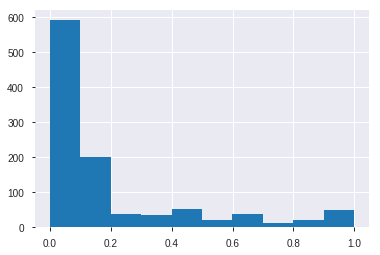

In [148]:
columnSummary.percNA.hist(bins=division)

### Full Diagnostic

In [122]:
pandas_profiling.ProfileReport(df.iloc[:, 10:30])

Number of variables,20
Number of observations,59159
Total Missing (%),13.2%
Total size in memory,9.0 MiB
Average record size in memory,160.0 B
Numeric,11
Categorical,6
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [41]:
columnSummary

,percNA,columnTypes
ValDate,0.000000,float64
IssDate,0.000000,float64
IssAgeALB,0.000000,float64
Dur,0.000000,float64
AttAge,0.000000,float64
Gender,0.000000,object
JointInd,0.000000,float64
AV,0.000000,float64
CSV,0.000000,float64
SCPeriod,0.000000,int64


In [40]:
df.Pol_TermReason.value_counts()

None    55002
S        3504
D         648
A           5
Name: Pol_TermReason, dtype: int64

In [44]:
df.Surr.value_counts()

0.0    58592
1.0      567
Name: Surr, dtype: int64

In [47]:
df.Birthdate.YYYYMM.1st.Child._C3.value_counts()

SyntaxError: invalid syntax (<ipython-input-47-dea255346de9>, line 1)

In [36]:
df.head()

,ValDate,IssDate,IssAgeALB,Dur,AttAge,Gender,JointInd,AV,CSV,SCPeriod,...,Company,Surr,Qual,EligibleInd,WDResponse,FirstEligQInd,Efficiency_Category_Sub,UtilizationInd,WDModelFilterIn,PolNum_UW
0,16343.0,16104.0,65.0,1.0,65.8,F,0.0,448559.96,421076.98,5,...,B,0.0,Q,1.0,0.0,0.0,NaN,0.0,1.0,294692
1,15613.0,14397.0,69.0,4.0,72.4,M,0.0,67321.31,64451.77,7,...,A,0.0,N,1.0,0.0,0.0,NaN,0.0,1.0,281394
2,16070.0,13518.0,55.0,7.0,62.6,M,0.0,301121.04,295758.92,7,...,A,0.0,Q,1.0,0.0,0.0,E,1.0,0.0,475776
3,16343.0,14419.0,53.0,6.0,58.3,F,0.0,187344.04,180762.56,7,...,A,0.0,Q,1.0,0.0,0.0,NaN,0.0,1.0,288738
4,15613.0,15044.0,63.0,2.0,65.2,F,0.0,183155.51,171789.66,6,...,B,0.0,Q,1.0,0.0,0.0,E,1.0,1.0,15320


### Test the algorithm with real data (sampled features, no missing value)

In [8]:
data = df.iloc[:, 2:15].values

In [9]:
start = time.time()
km = KModes(n_clusters=9, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)
end = time.time()
print("Time took to train the model: ", end-start)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13064, cost: 426389.0
Run 1, iteration: 2/100, moves: 4943, cost: 422674.0
Run 1, iteration: 3/100, moves: 2236, cost: 422674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9894, cost: 420038.0
Run 2, iteration: 2/100, moves: 64, cost: 420038.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10462, cost: 421994.0
Run 3, iteration: 2/100, moves: 4529, cost: 421662.0
Run 3, iteration: 3/100, moves: 26, cost: 421662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12340, cost: 424370.0
Run 4, iteration: 2/100, moves: 6204, cost: 419434.0
Run 4, iteration: 3/100, moves: 4435, cost: 419376.0
Run 4, iteration: 4/100, moves: 63, cost: 419376.0
Init: initializing centroids
Init: initializing

In [33]:
km.fit

<bound method KModes.fit of KModes(cat_dissim=<function matching_dissim at 0x7ff3a42db2f0>, init='Huang',
    max_iter=100, n_clusters=9, n_init=5, verbose=1)>